In [1]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import gc

c:\Users\Shashwat\anaconda3\envs\GPU1\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

from keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [3]:
print('TensorFlow version: ', tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

TensorFlow version:  2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
data_path = 'D:\hdf5 files\deepfake wale\dfdc_data_f1.h5'
# tmp_debug_path = 'D:\Me\\tp\\tmp_debug'

In [5]:
h5_file = h5py.File(data_path,'r')

In [6]:
y_train = h5_file['y_train'][:5000]
y_test = h5_file['y_test'][:2500]
X_train = h5_file['X_images_train'][:5000]
X_test = h5_file['X_images_test'][:2500]


In [15]:
resnet = ResNet101V2(include_top=False,input_shape=(128,128,3),weights='imagenet',pooling='max')
for layer in resnet.layers[:-15]:
    layer.trainable = False


In [8]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
K.clear_session()
gc.collect()

model = Sequential()
model.add(resnet)

model.add(Dense(units=512,activation='relu',kernel_regularizer=l2(0.001)))

model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(units=128,activation='relu',kernel_regularizer=l2(0.001)))  #256
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=64,activation='relu',kernel_regularizer=l2(0.001)))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [17]:
model.compile(optimizer = Adam(lr=0.000001), loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\Shashwat\anaconda3\envs\GPU1\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
num_epochs = 20
history = model.fit(
    X_train,y_train,
    epochs = num_epochs,
    validation_data = (X_test,y_test),
    validation_steps = 10,
    batch_size = 32, 
    callbacks = early_stopping
)
print(history.history)

Epoch 1/20
157/157 [==============================] - 32s 157ms/step - loss: 1.8893 - accuracy: 0.5182 - val_loss: 1.8563 - val_accuracy: 0.5437
Epoch 2/20
157/157 [==============================] - 20s 127ms/step - loss: 1.8210 - accuracy: 0.5752 - val_loss: 1.7630 - val_accuracy: 0.6344
Epoch 3/20
157/157 [==============================] - 20s 127ms/step - loss: 1.7482 - accuracy: 0.6368 - val_loss: 1.6980 - val_accuracy: 0.6969
Epoch 4/20
157/157 [==============================] - 20s 128ms/step - loss: 1.7062 - accuracy: 0.6842 - val_loss: 1.6519 - val_accuracy: 0.7344
Epoch 5/20
157/157 [==============================] - 20s 129ms/step - loss: 1.6615 - accuracy: 0.7114 - val_loss: 1.6120 - val_accuracy: 0.7719
Epoch 6/20
157/157 [==============================] - 21s 133ms/step - loss: 1.6308 - accuracy: 0.7414 - val_loss: 1.5790 - val_accuracy: 0.7937
Epoch 7/20
157/157 [==============================] - 21s 137ms/step - loss: 1.5934 - accuracy: 0.7774 - val_loss: 1.5505 - val_ac

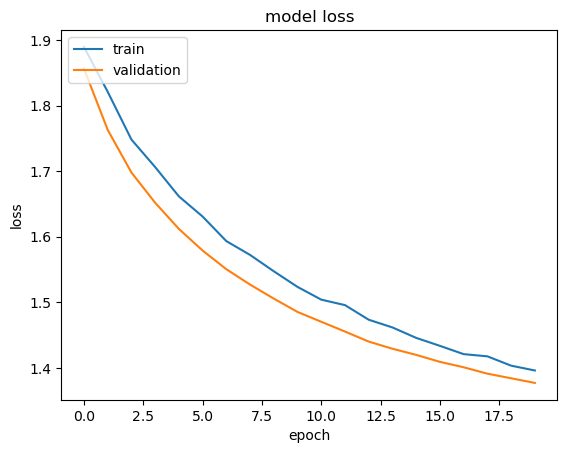

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

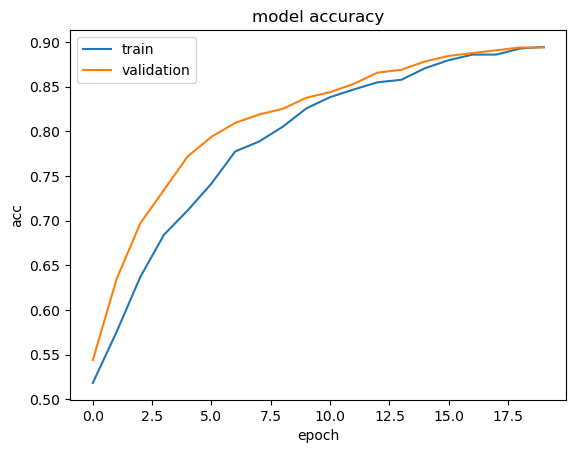

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')